In [1]:
# Import packages
import pandas as pd
import numpy as np
import os
import numpy as np
from scipy import stats
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_csv('../APTARDI/UTR_filename.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52390 entries, 0 to 52389
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqname            52390 non-null  object 
 1   source             52390 non-null  object 
 2   feature            52390 non-null  object 
 3   start              52390 non-null  int64  
 4   end                52390 non-null  int64  
 5   strand             52390 non-null  object 
 6   ref_gene_id        52390 non-null  object 
 7   reference_id       52390 non-null  object 
 8   filename           52390 non-null  object 
 9   transcript_length  52390 non-null  int64  
 10  molecularSubtype   52390 non-null  object 
 11  Start_UTRref       52390 non-null  int64  
 12  End_UTRref         52390 non-null  int64  
 13  UTR_length         52390 non-null  int64  
 14  ref_UTR_length     52390 non-null  int64  
 15  UTR_diff           52390 non-null  int64  
 16  UTR_length (ln)    523

In [4]:
# Improt packages
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so

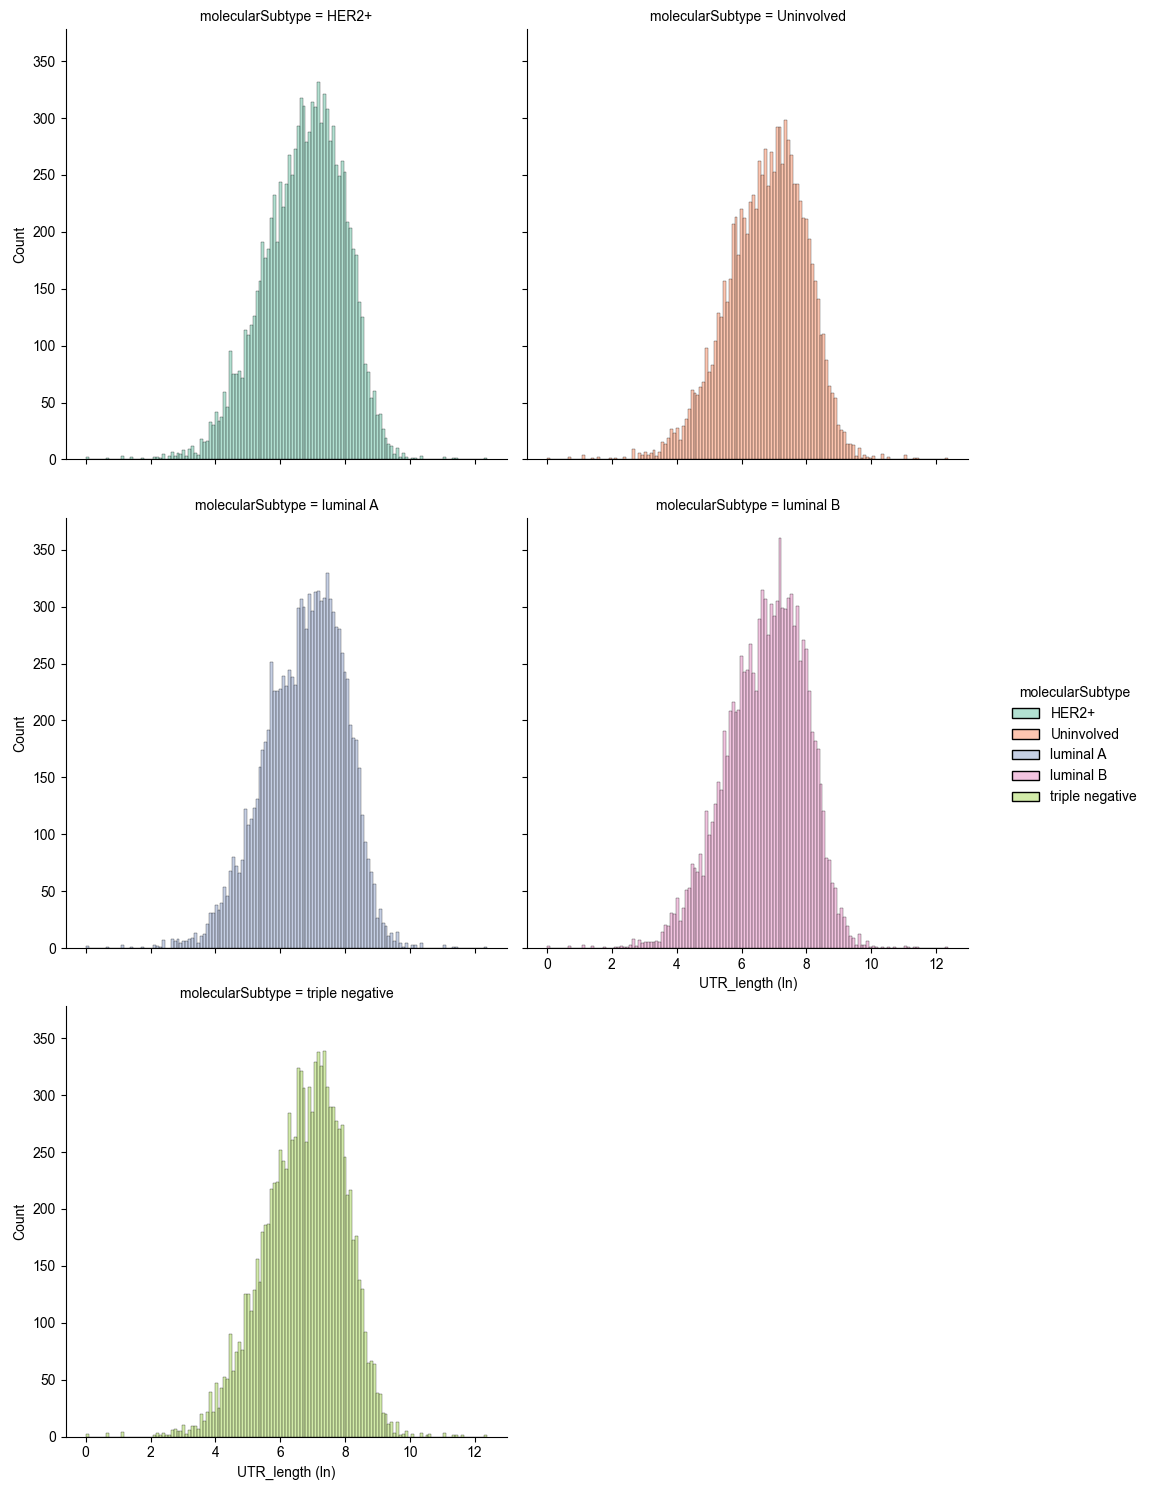

In [5]:

# plt.figure(figsize=())
g = sns.displot(df, x="UTR_length (ln)", col='molecularSubtype', hue = 'molecularSubtype', col_wrap=2, palette='Set2')
# g = plt.title("Rozkład długości 3'UTR (log) dla podtypów nowotworu piersi")
g = sns.set_theme()
g = sns.set_context("paper")
plt.xlim=50


# Set plot title and labels

# plt.savefig("distribution.png")



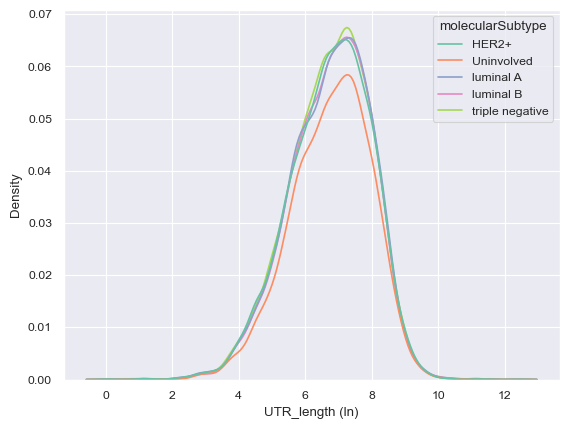

In [9]:
sns.kdeplot(data=df, x="UTR_length (ln)", hue="molecularSubtype", palette='Set2')
sns.color_palette()
sns.set_theme()
sns.set_context("paper")
plt.savefig("density.png", dpi=300)


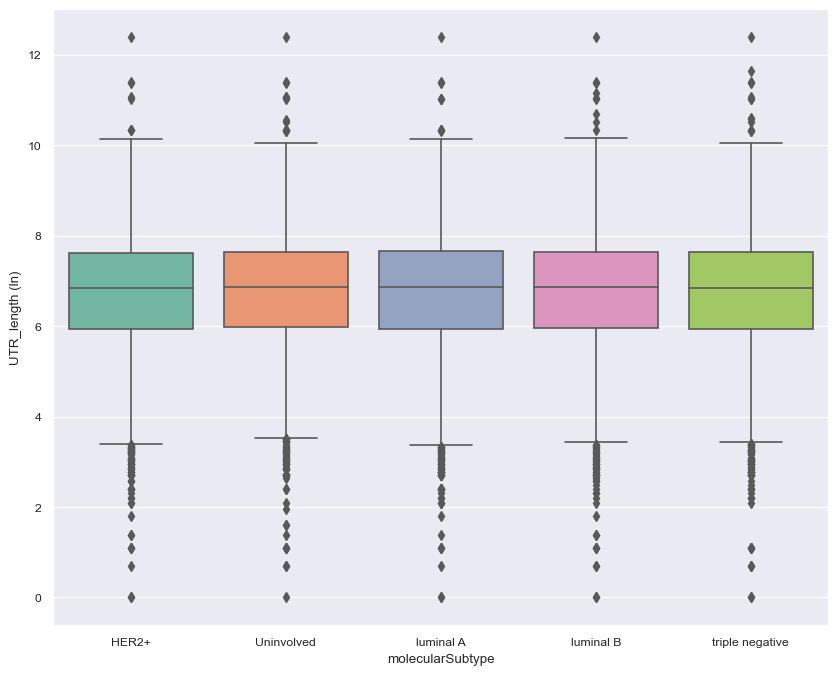

In [10]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x="molecularSubtype", y="UTR_length (ln)", palette='Set2')
sns.set_context("paper")
sns.set_theme()

plt.savefig("box.png")


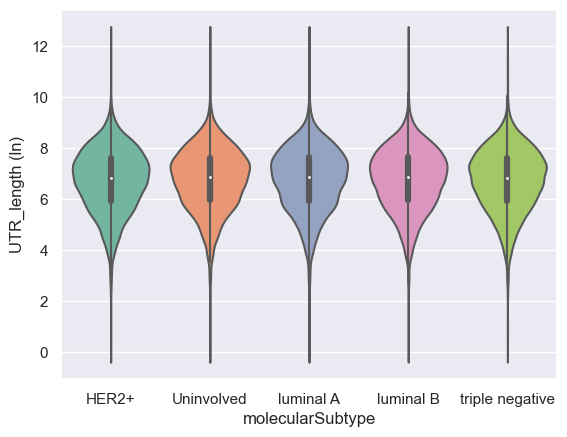

In [11]:
sns.violinplot(data=df, x="molecularSubtype", y="UTR_length (ln)", palette='Set2')
sns.set_context("paper")
sns.set_theme()
# plt.savefig("violin.png", dpi=300)

In [12]:
import seaborn.objects as so

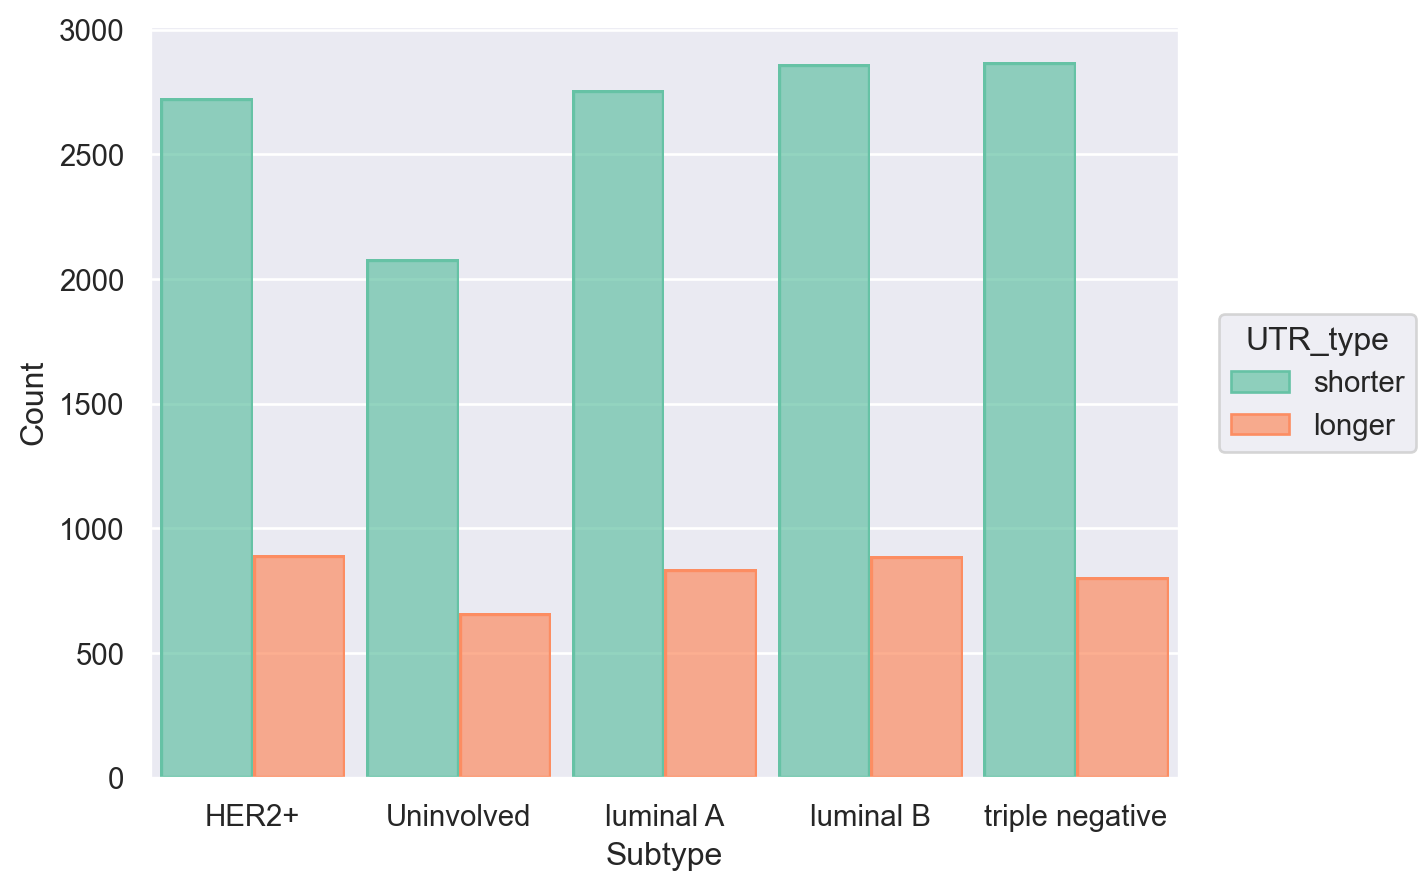

In [59]:
# sns.barplot(counts, x="molecularSubtype", y="count", color="UTR_type", palette='Set2', hue ='UTR_type', dodge=True, width=1)
# (so.Plot(counts, x="molecularSubtype", y="count", color="UTR_type", text="count")
# .add(so.Bar(), so.Dodge())
# .add(so.Text(color="w", halign="right"))
# .layout(size=(8, 8))
# .label(title="Zliczenie 3'UTR dla różnych podtypów nowotworu piersi", x="Podtypy", y='Ilość')
# )
counts = pd.read_csv('counts_nosample.csv')
fig = (
    so.Plot(counts, x="molecularSubtype", y="count", color="UTR_type")
    .add(so.Bar(width=0.9), so.Agg(), so.Dodge())
    .add(so.Text(color="w", halign="right"))
    .label(x="Subtype", y='Count')
    .scale(color="Set2")
    
)

# plt.savefig("counts.png", dpi=300)





fig


In [60]:
df

,seqname,source,feature,start,end,strand,ref_gene_id,reference_id,transcript_length,molecularSubtype,...,End_UTRref,UTR_length,ref_UTR_length,UTR_diff,UTR_type,z_score_UTR,scaled_UTR,UTR_log,z_score_diff,scaled_diff
0,chr11,StringTie,transcript,118344344,118355161,+,CD3G,NM_000073.3,10817,Uninvolved,...,118352487,2692,18,2674,longer,0.072031,1.340292,7.898040,0.348491,1.926197
1,chr11,StringTie,transcript,118344344,118355161,+,CD3G,NM_000073.3,10817,luminal B,...,118352487,2692,18,2674,longer,0.072031,1.340292,7.898040,0.348491,1.926197
2,chr12,aptardi,transcript,57748218,57752310,-,CDK4,NM_000075.4,4092,luminal A,...,57748524,306,798,-492,shorter,-0.212115,-0.320111,5.723585,-0.038510,0.142535
3,chr11,StringTie,transcript,2883218,2885765,-,CDKN1C,NM_000076.2_2,2547,triple negative,...,2884003,785,5,780,longer,-0.155071,0.013222,6.665684,0.116975,0.859155
4,chr11,StringTie,transcript,2883218,2885765,-,CDKN1C,NM_000076.2_2,2547,Uninvolved,...,2884003,785,5,780,longer,-0.155071,0.013222,6.665684,0.116975,0.859155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17379,chr4,StringTie,transcript,16501812,16898681,-,LDB2,XM_024454278.1,396869,luminal B,...,16505877,4065,38,4027,longer,0.235541,2.295755,8.310169,0.513878,2.688451
17380,chr4,aptardi,transcript,16501474,16898659,-,LDB2,XM_024454279.1,397185,luminal A,...,16502642,1168,831,337,longer,-0.109460,0.279749,7.063048,0.062824,0.609577
17381,chr5,aptardi,transcript,88195189,88268884,-,TMEM161B,XM_024454378.1,73695,triple negative,...,88196377,1188,281,907,longer,-0.107079,0.293667,7.080026,0.132499,0.930704
17382,chr5,aptardi,transcript,2746117,2751015,-,IRX2,XM_024454379.1,4898,triple negative,...,2747563,1446,1584,-138,shorter,-0.076354,0.473208,7.276556,0.004762,0.341972


In [215]:
df2 = df[df['UTR_type']!='no change']

In [ ]:
plt.figure(figsize=(10, 12))
sns.violinplot(data=df2, x="molecularSubtype", y="UTR_log", palette='Set2')
sns.set_context("paper")
sns.set_theme()
# plt.savefig("violin.png", dpi=300)

In [356]:
df

,seqname,source,feature,start,end,strand,cov,ref_gene_id,reference_id,filename,...,Start_UTRref,End_UTRref,UTR_length,ref_UTR_length,UTR_diff,UTR_z_score,scaled_UTR,UTR_log,scaled_diff,UTR_type
0,chr1,StringTie,transcript,998962,1001052,-,12.208676,HES4,XM_005244771.4,SRR19969208,...,998961,999058,96,97,-1,-0.382177,-0.509689,4.564348,0.0,no change
1,chr1,StringTie,transcript,998962,1001052,-,5.454756,HES4,XM_005244771.4,SRR19969210,...,998961,999058,96,97,-1,-0.382177,-0.509689,4.564348,0.0,no change
2,chr1,StringTie,transcript,998962,1001052,-,18.634724,HES4,XM_005244771.4,SRR19969211,...,998961,999058,96,97,-1,-0.382177,-0.509689,4.564348,0.0,no change
3,chr1,StringTie,transcript,998962,1001052,-,17.630241,HES4,XM_005244771.4,SRR19969212,...,998961,999058,96,97,-1,-0.382177,-0.509689,4.564348,0.0,no change
4,chr1,StringTie,transcript,998962,1001052,-,89.299171,HES4,XM_005244771.4,SRR19969216,...,998961,999058,96,97,-1,-0.382177,-0.509689,4.564348,0.0,no change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107915,chrY,StringTie,transcript,2691295,2736437,+,14.379564,CD99,NM_001321367.2,SRR19969234,...,2733364,2736437,3073,3073,0,0.318308,1.238403,8.030410,1.0,no change
107916,chrY,StringTie,transcript,1336574,1382689,+,1.167712,IL3RA,XM_017030043.2,SRR19969244,...,1382465,1382689,224,224,0,-0.352059,-0.434527,5.411646,1.0,no change
107917,chrY,StringTie,transcript,1336575,1382689,+,2.449764,IL3RA,XM_005274780.5,SRR19969244,...,1382465,1382689,224,224,0,-0.352059,-0.434527,5.411646,1.0,no change
107918,chrY,StringTie,transcript,1336785,1382689,+,24.917196,IL3RA,NM_002183.4,SRR19969244,...,1382465,1382689,224,224,0,-0.352059,-0.434527,5.411646,1.0,no change


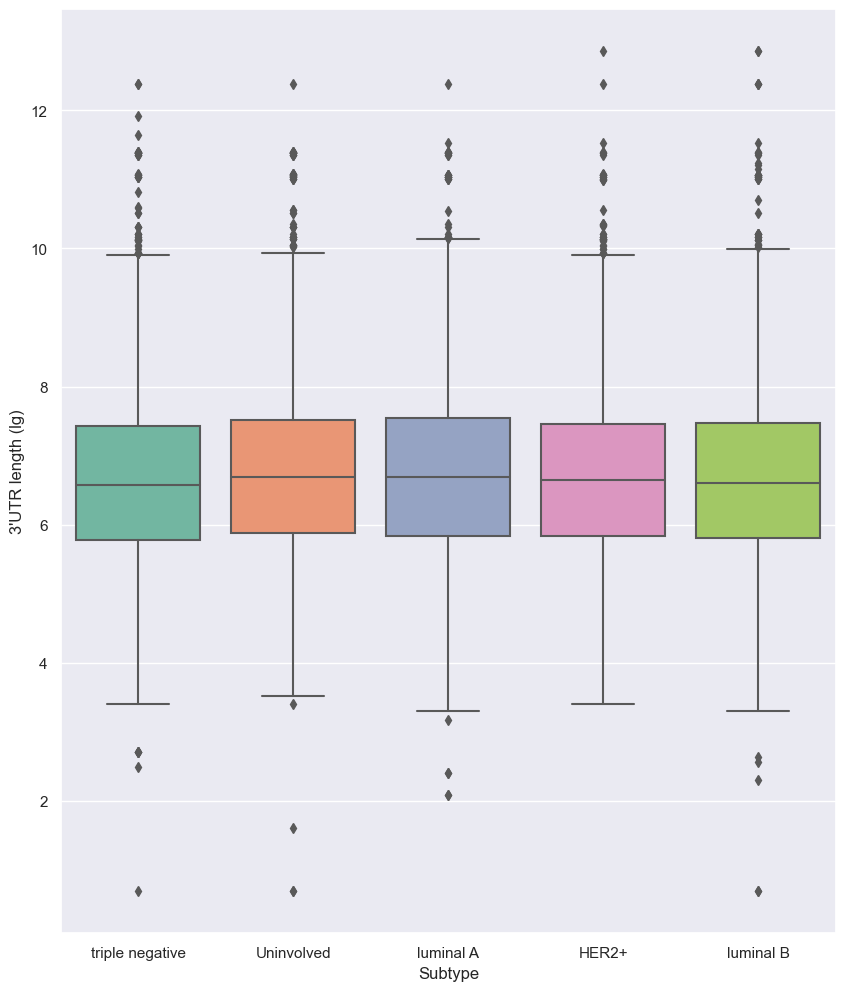

In [385]:
plt.figure(figsize=(10, 12))
sns.boxplot(data=df2, x="molecularSubtype", y="UTR_log", palette='Set2')
sns.set_context("paper")
sns.set_theme()
# plt.ylim(-20, 15000)
plt.xlabel("Subtype")
plt.ylabel("3'UTR length (lg)")


plt.savefig("box_log_withOUTnochange.png", dpi=300)

In [49]:
lumA['UTR_length'].median()

838.0

In [50]:
her['UTR_length'].median()

804.0

In [51]:
lumB['UTR_length'].median()

790.5

In [52]:
triple['UTR_length'].median()

755.0

In [53]:
normal['UTR_length'].median()

807.0

In [43]:
short = df2[df2['UTR_type']=='shorter']
long = df2[df2['UTR_type']=='longer']

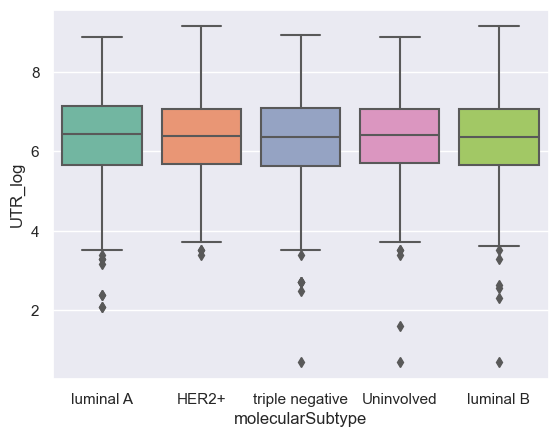

In [44]:
sns.boxplot(data=short, x="molecularSubtype", y="UTR_log", palette='Set2')
sns.set_context("paper")
sns.set_theme()
# plt.savefig("violin_short.png", dpi=300)

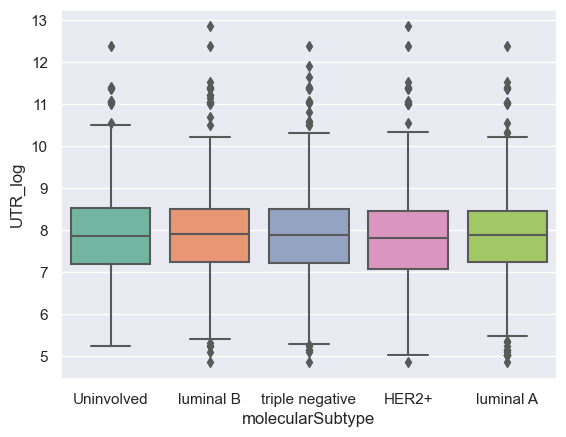

In [45]:
sns.boxplot(data=long, x="molecularSubtype", y="UTR_log", palette='Set2')
sns.set_context("paper")
sns.set_theme()
# plt.savefig("violin_short.png", dpi=300)

In [ ]:
sns.displot(short, x="UTR_log", col='molecularSubtype',  palette='Set2')
plt.suptitle("Rozkład długości 3'UTR (log) dla podtypów nowotworu piersi", y=1.02)
sns.set_theme()
sns.set_context("paper")
# plt.savefig("distribution.png", dpi=300)


In [ ]:
sns.displot(long, x="UTR_log", col='molecularSubtype',  palette='Set2')
plt.suptitle("Rozkład długości 3'UTR (log) dla podtypów nowotworu piersi", y=1.02)

sns.set_theme()
sns.set_context("paper")
# plt.savefig("distribution.png", dpi=300)


In [33]:
df2

,seqname,source,feature,start,end,strand,ref_gene_id,reference_id,transcript_length,molecularSubtype,Start_UTRref,End_UTRref,UTR_length,ref_UTR_length,UTR_diff,UTR_type,z_score_UTR,scaled_UTR,UTR_log
0,chr11,StringTie,transcript,118344344,118355161,+,CD3G,NM_000073.3,10817,Uninvolved,118352469,118352487,2692,18,2674,longer,0.072031,1.340292,7.898040
1,chr11,StringTie,transcript,118344344,118355161,+,CD3G,NM_000073.3,10817,luminal B,118352469,118352487,2692,18,2674,longer,0.072031,1.340292,7.898040
2,chr12,aptardi,transcript,57748218,57752310,-,CDK4,NM_000075.4,4092,luminal A,57747726,57748524,306,798,-492,shorter,-0.212115,-0.320111,5.723585
3,chr11,StringTie,transcript,2883218,2885765,-,CDKN1C,NM_000076.2_2,2547,triple negative,2883998,2884003,785,5,780,longer,-0.155071,0.013222,6.665684
4,chr11,StringTie,transcript,2883218,2885765,-,CDKN1C,NM_000076.2_2,2547,Uninvolved,2883998,2884003,785,5,780,longer,-0.155071,0.013222,6.665684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17379,chr4,StringTie,transcript,16501812,16898681,-,LDB2,XM_024454278.1,396869,luminal B,16505839,16505877,4065,38,4027,longer,0.235541,2.295755,8.310169
17380,chr4,aptardi,transcript,16501474,16898659,-,LDB2,XM_024454279.1,397185,luminal A,16501811,16502642,1168,831,337,longer,-0.109460,0.279749,7.063048
17381,chr5,aptardi,transcript,88195189,88268884,-,TMEM161B,XM_024454378.1,73695,triple negative,88196096,88196377,1188,281,907,longer,-0.107079,0.293667,7.080026
17382,chr5,aptardi,transcript,2746117,2751015,-,IRX2,XM_024454379.1,4898,triple negative,2745979,2747563,1446,1584,-138,shorter,-0.076354,0.473208,7.276556


In [31]:
df3 = pd.read_csv('all_triple_results.csv')

In [34]:
df2 = df2[(df2['molecularSubtype']=='triple negative') | (df2['molecularSubtype']=='Uninvolved')]

In [51]:
# df = df.reset_index()
df = df.drop('index', axis=1)


In [35]:
df3 = pd.merge(df2, df3, on='reference_id')

<Axes: xlabel='log2FoldChange', ylabel='UTR_log'>

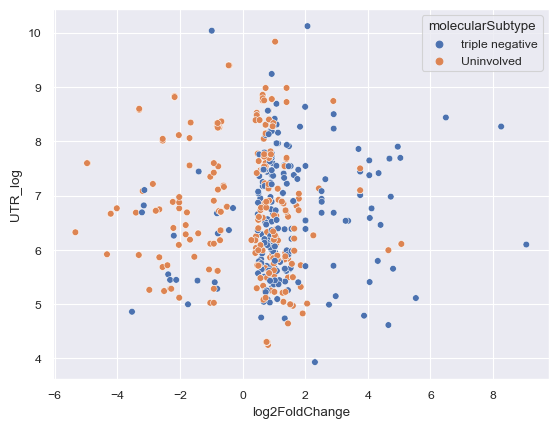

In [36]:
# g = sns.relplot(data=df3, x="log2FoldChange", y="scaled_diff", hue='molecularSubtype')
sns.scatterplot(data=df3, x="log2FoldChange", y="UTR_length (ln)", hue='molecularSubtype')
# g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")


In [61]:
df2['UTR_log'] = np.log(df2['UTR_length'])

C:\Users\natdzi3\AppData\Local\Temp\ipykernel_22392\3924809997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['UTR_log'] = np.log(df2['UTR_length'])


In [9]:
df2.sort_values('molecularSubtype')

,seqname,source,feature,start,end,strand,ref_gene_id,reference_id,transcript_length,molecularSubtype,Start_UTRref,End_UTRref,UTR_length,ref_UTR_length,UTR_diff,UTR_type,z_score_UTR,scaled_UTR,UTR_log
11291,chr1,aptardi,transcript,67704777,67833467,-,GNG12,NM_018841.6,128690,HER2+,67701474,67705450,673,3976,-3303,shorter,-0.168409,-0.064718,6.511745
10064,chr8,aptardi,transcript,144850396,144853048,-,COMMD5,NM_014066.4,2652,HER2+,144850175,144850663,267,488,-221,shorter,-0.216760,-0.347251,5.587249
3326,chr22,aptardi,transcript,21567714,21621914,+,UBE2L3,NM_001256356.2,54200,HER2+,21621669,21624034,245,2365,-2120,shorter,-0.219380,-0.362561,5.501258
3327,chr22,aptardi,transcript,21567714,21623014,+,UBE2L3,NM_001256356.2,55300,HER2+,21621669,21624034,1345,2365,-1020,shorter,-0.088382,0.402923,7.204149
3328,chr22,aptardi,transcript,21567714,21623514,+,UBE2L3,NM_001256356.2,55800,HER2+,21621669,21624034,1845,2365,-520,shorter,-0.028837,0.750870,7.520235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,chr5,StringTie,transcript,95813849,95822726,-,GLRX,NM_001243658.2,8877,triple negative,95816506,95816512,2663,6,2657,longer,0.068578,1.320111,7.887209
8269,chr5,StringTie,transcript,151742822,151758631,-,ATOX1,NM_004045.4,15809,triple negative,151746278,151746324,3502,46,3456,longer,0.168494,1.903967,8.161090
14777,chr6,aptardi,transcript,37819781,38152634,+,ZFAND3,XM_005249269.2,332853,triple negative,38152389,38154624,245,2235,-1990,shorter,-0.219380,-0.362561,5.501258
1212,chr16,aptardi,transcript,21599577,21655829,+,METTL9,NM_001077180.3_2,56252,triple negative,21655432,21657471,397,2039,-1642,shorter,-0.201278,-0.256785,5.983936


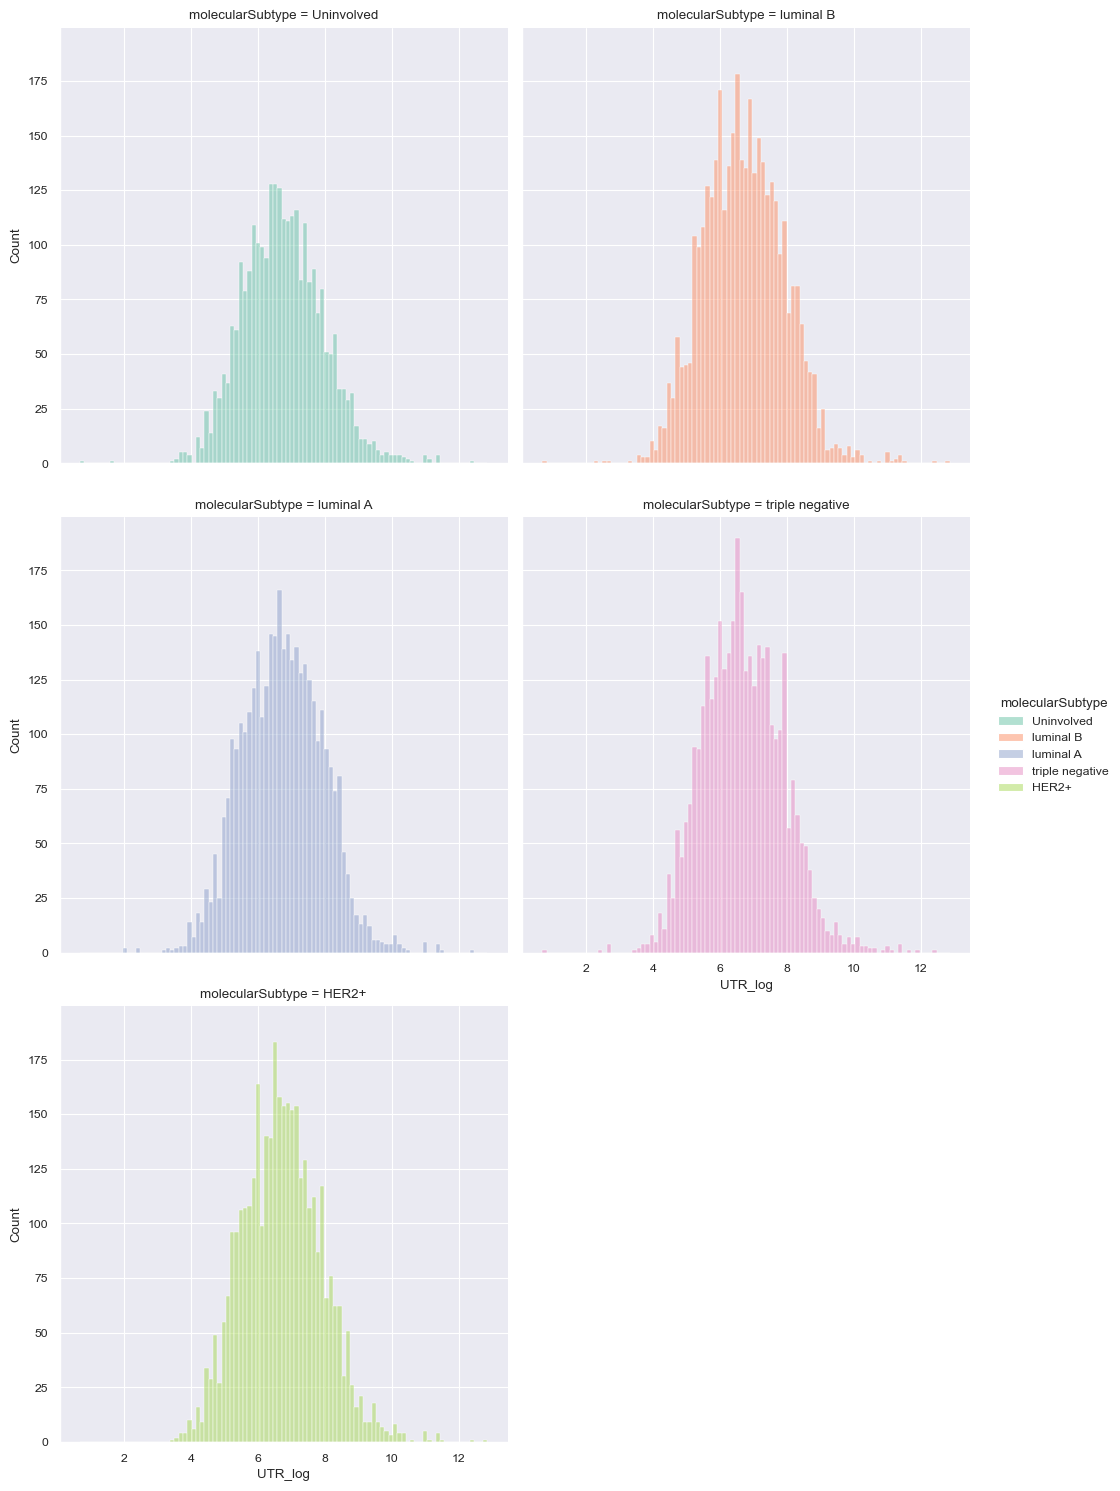

In [43]:
g = sns.displot(df, x="UTR_log", col='molecularSubtype', hue = 'molecularSubtype', col_wrap=2, palette='Set2')
# g = plt.title("Rozkład długości 3'UTR (log) dla podtypów nowotworu piersi")
g = sns.set_theme()
g = sns.set_context("paper")


# Set plot title and labels

plt.savefig("distribution.png")

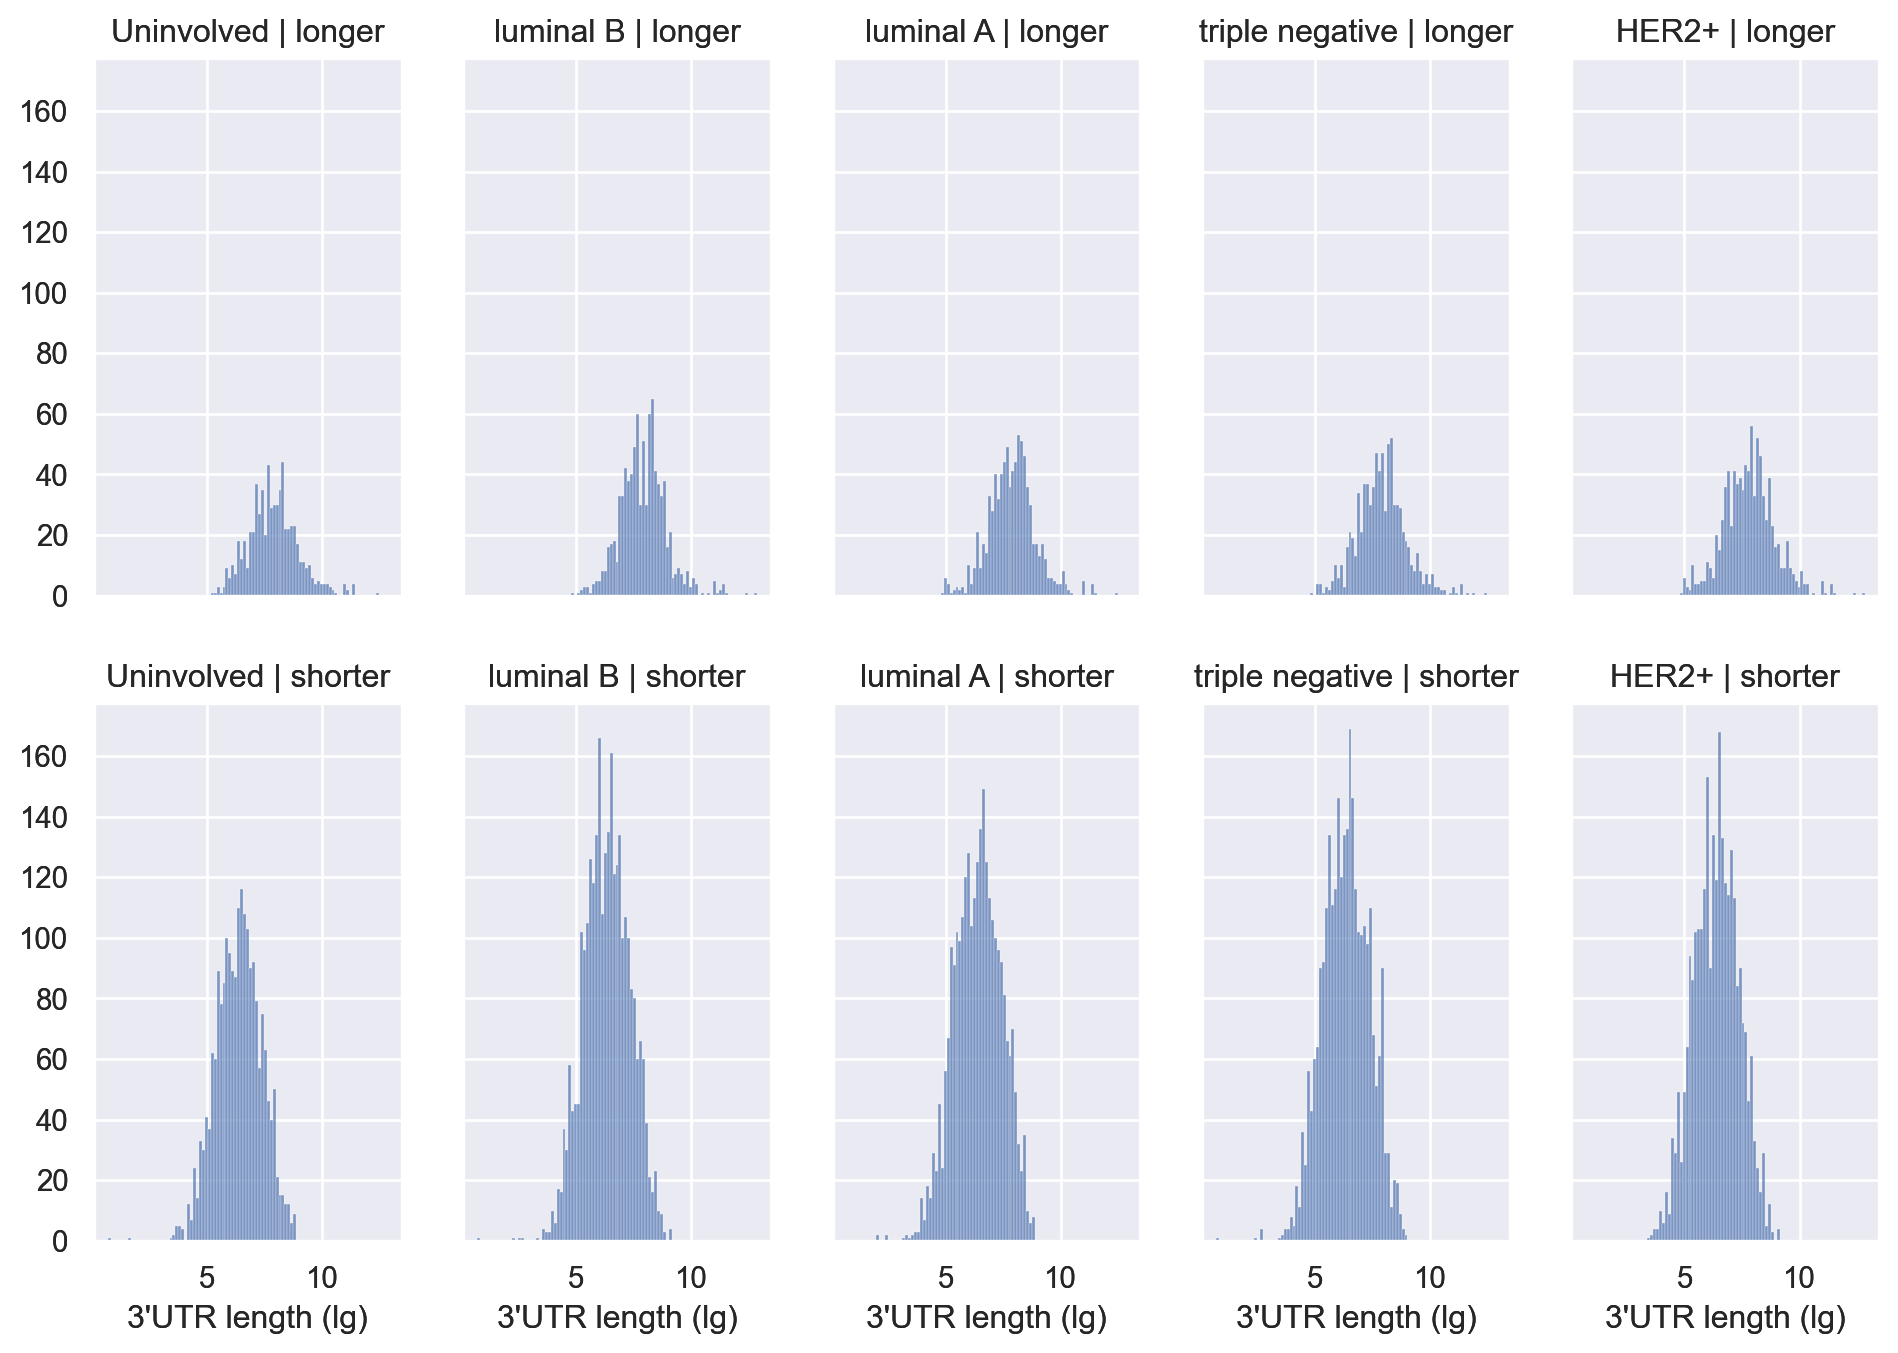

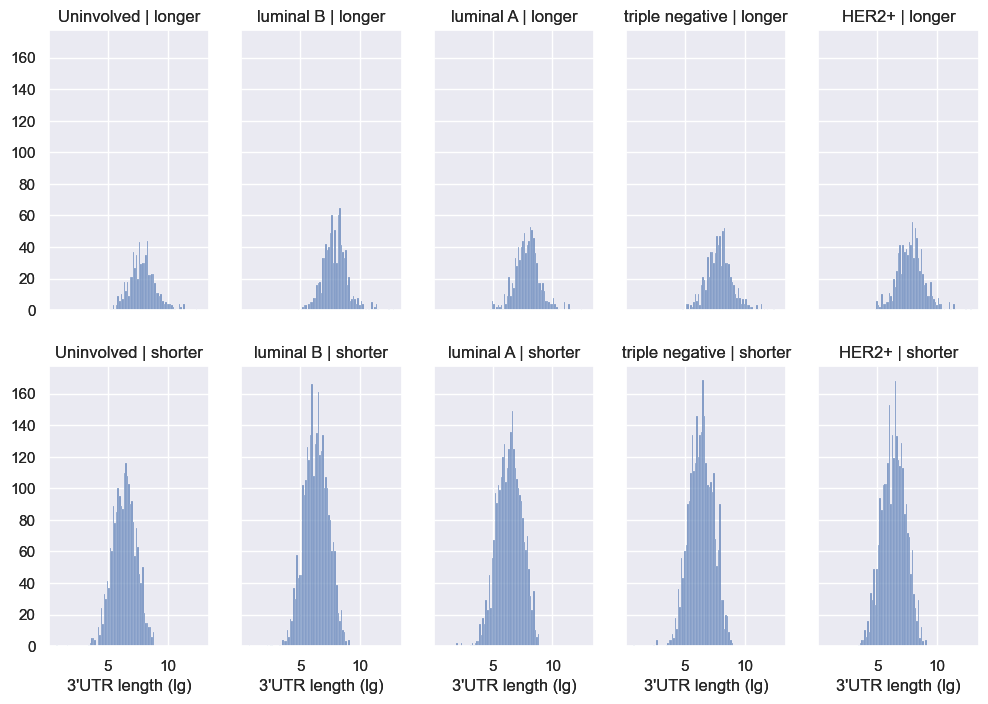

In [42]:
f = plt.figure(figsize=(12, 8))
#sf1, sf2 = f.subfigures(1, 2)
fig = (
    so.Plot(df, x="UTR_log")
    .facet(col="molecularSubtype", row="UTR_type")
    .add(so.Bars(), so.Hist(), so.Dodge())
    .on(f)
    .label(
        x="3'UTR length (lg)", y="",
        color=str.capitalize
    )
    .save("distribution_type.png")
)
fig